<a href="https://colab.research.google.com/github/Harryjha/deeplearning-proj/blob/main/01_neural_network_regression_with_tensorflow_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction with Regression with Neural network in Tensorflow

There are many defination  for a regression problem but in our case, we're going to simplyfy it: predicting a numerical variable based on some other combination of variable , even shorter predicting a no

In [ ]:
# Input tensflow

import tensorflow  as tf
print (tf.__version__)



2.12.0


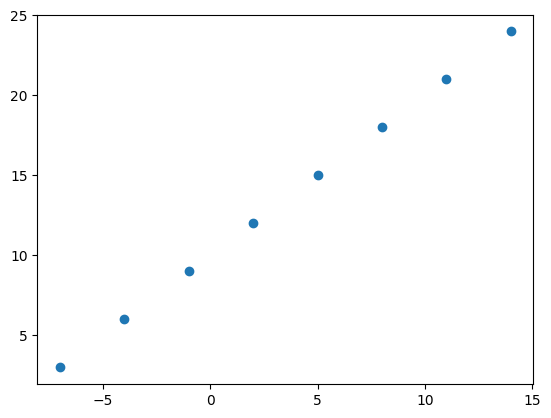

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Create features
X = np.array([-7.0, -4.0 , -1.0 , 2.0 , 5.0 , 8.0 , 11.0 , 14.0])

# create lable
Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])
# visualize it
plt.scatter(X,Y);



In [ ]:
X + 10

array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])

In [ ]:
Y == X + 10


array([ True,  True,  True,  True,  True,  True,  True,  True])

### Input and Output

In [ ]:
# Create a demo a tensor for housing price pridiction problem
house_info = tf.constant(["bedrom", "batroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedrom', b'batroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0],Y[0]

(-7.0, 3.0)

In [ ]:
X[1],Y[1]

(-4.0, 6.0)

In [ ]:
input_shape = X.shape
output_shape = Y .shape
input_shape , output_shape

((8,), (8,))

In [ ]:
#Trun our numpy array into tensor'
X = tf.constant(X)
y = tf.constant(Y)
X,Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.]))

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape,output_shape

(TensorShape([]), ())

In [ ]:
X[0].ndim

0

In [ ]:
X[0], Y[0]

(<tf.Tensor: shape=(), dtype=float64, numpy=-7.0>, 3.0)

In [ ]:
X = tf.cast(tf.constant(X), dtype=tf.float32)
Y = tf.cast(tf.constant(Y),dtype=tf.float32)
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape,output_shape

(TensorShape([]), TensorShape([]))

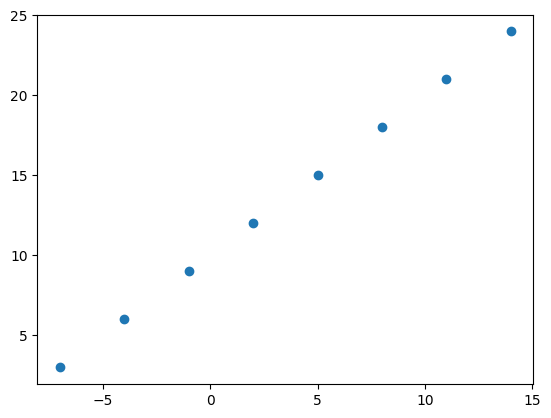

In [ ]:
plt.scatter(X,Y)

### steps in modelin with tenorflow
1. **creating a model**- define the input and output layers, as well as the hiddenlayer of  a deep learning model.
2. **compiling a model** - define the loss function ( in other words , the function which tell our model how wrong it is) and the optimizer( tell our model how to improve the pattern its lerning) and evaluation matrics(what we can interpret the performsnceof our modle).
3. **Fitting a model** - leting the model try to find the pattern between X and Y(features and labeling)


In [ ]:
X, Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X,Y,epochs=5)
#model.fit(tf.expand_dims(X, axis= -1),Y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 471ms/step - loss: 17.0116 - mae: 17.0116
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 16.7304 - mae: 16.7304
Epoch 3/5
1/1 [==============================] - 0s 16ms/step - loss: 16.4491 - mae: 16.4491
Epoch 4/5
1/1 [==============================] - 0s 9ms/step - loss: 16.1679 - mae: 16.1679
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 15.8866 - mae: 15.8866


In [ ]:
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# try and make pridicti
y_pred= model.predict([17.0])
y_pred

1/1 [==============================] - 0s 86ms/step


array([[-9.29952]], dtype=float32)

In [ ]:
y_pred+ 13

array([[3.7004805]], dtype=float32)

### Improving our model
we can improve our model, by altering the steps we took to create a model.
1. **creating a modle** - here we might add more layers, increase the no of hidden units (all called neurons ) whithin each of the hidden layers, change the activation function of each layer.
2. **compile a model** - here we might change optimiztion function or perhaps the **learing rate** of the optimization function.
3. **Fitting a model**- here. we might fit a model for more **epoch**(leave it training for longer) or on more data (give the model more example to learn from).

In [ ]:
#lets rebuit our model

model = tf.keras.Sequential([
     tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X,Y,epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 312ms/step - loss: 16.0321 - mae: 16.0321
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 15.7508 - mae: 15.7508
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 15.4696 - mae: 15.4696
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 15.1883 - mae: 15.1883
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 14.9231 - mae: 14.9231
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 14.7906 - mae: 14.7906
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 14.6581 - mae: 14.6581
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 14.5256 - mae: 14.5256
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 14.3931 - mae: 14.3931
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 14.2606 - mae: 14.2606
Epoch 11/100
1/1 [==============================] - 

In [ ]:
X,Y


(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 61ms/step


array([[29.54227]], dtype=float32)

In [ ]:
#create a model with extara hidden model with 100 epox
model = tf.keras.Sequential([
  tf.keras.Input(shape=(1,)),
  tf.keras.layers.Dense(50,activation=None),
  tf.keras.layers.Dense(1)
])
#compile a model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['mae'])
model.fit(X,Y,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 607ms/step - loss: 13.6430 - mae: 13.6430
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 12.9963 - mae: 12.9963
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 12.3535 - mae: 12.3535
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 11.7121 - mae: 11.7121
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 11.0696 - mae: 11.0696
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 10.4229 - mae: 10.4229
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.7691 - mae: 9.7691
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 9.1053 - mae: 9.1053
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 8.4286 - mae: 8.4286
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.7358 - mae: 7.7358
Epoch 11/100
1/1 [==============================] - 0s 1

In [ ]:
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
model.predict([17.0])

1/1 [==============================] - 0s 111ms/step


array([[27.238213]], dtype=float32)

###Evaluating a model
In practice, a typical workflow you''ll go through when buiding neutral network:
```
Build a model -> fit it  -> evalualte it -> tweak a model ->
fit it -> evaluate it -> tweak a model -> fit it -> evaluate it..
```

When it comes to evaluation... there are 3 words you should memorize
> "visualize, visualize, visualize"
it's a good idea to visualize:
* The data - What data are we working with? What does it look like ?

In [ ]:
# Make a big dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make a lable for the dataset
Y = X + 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

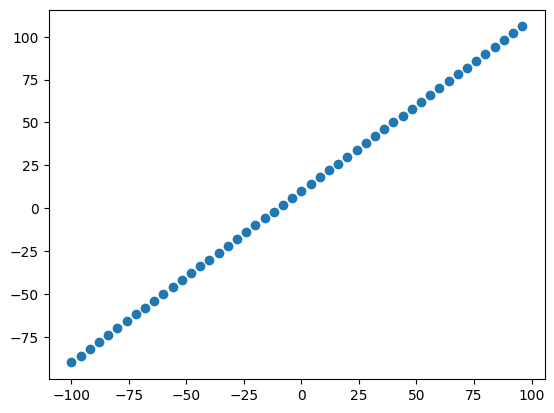

In [ ]:
#visualize a data
import matplotlib.pyplot as plt
plt.scatter(X,Y)

### 3 set
* Training set -
* Validation sat -
* Test set -

In [ ]:
# check the length  of how many sample we have
len(X)

50

In [ ]:
# split the data into train and test sets
X_train = X[:40] # first 40 are training sample (80% of the data )
Y_train = Y[:40]

X_test = X[40:] # last 10 are testing sample (20% of the data )
Y_test = Y[40:]
len(X_train),len(X_test),len(Y_train),len(Y_test)

(40, 10, 40, 10)

### Visualizing a data
now we've got our data in training and test sets...lets visualize it again!

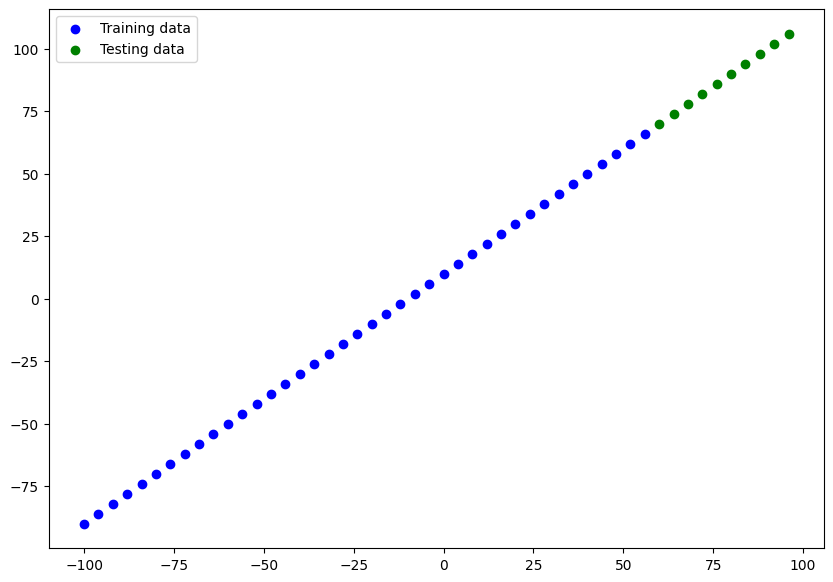

In [ ]:
plt.figure(figsize=(10,7))
#plot training data  in bule
plt.scatter(X_train, Y_train, c="b",label="Training data")
#plot test data in green
plt.scatter(X_test,Y_test,c="g",label="Testing data")
#show a legend
plt.legend();


In [ ]:
# lets have look at how to build a neural network for our given data
# 1. create a model
model = tf.keras.Sequential([
  tf.keras.Input(shape=(1,)),
  tf.keras.layers.Dense(50,activation=None),
  tf.keras.layers.Dense(1)
])
# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
#fit the model
#model.fit(X_train,Y_train,epochs=100)

### Visualizing the model

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 50)                100       
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# lets create a model which build automatically by defining the input_shape ar
tf.random.set_seed(42)

#create a model
model= tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape =[1], name="input_layers"),
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1, name="output_layer")
], name= "model_1")
#2. complile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              #optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
model.fit(X_train,Y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 11ms/step - loss: 18.3492 - mae: 18.3492
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 14.2702 - mae: 14.2702
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 12.0751 - mae: 12.0751
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 9.4514 - mae: 9.4514
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 10.6576 - mae: 10.6576
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 7.4509 - mae: 7.4509
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 9.2601 - mae: 9.2601
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 7.6313 - mae: 7.6313
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 8.8330 - mae: 8.8330
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9741 - mae: 9.9741
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - lo

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Dense)        (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 50)                550       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


* Total praams = total no of parameters in the model
* Trainable params = these are the parameters (patterns) the model can update as it trains.
* non-trainable prams = these parameters arent update during the training


In [ ]:
#lets fit our model data
model.fit(X_train, Y_train, epochs=100,verbose=0)

In [ ]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layers (Dense)        (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 50)                550       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 621
Trainable params: 621
Non-trainable params: 0
_________________________________________________________________


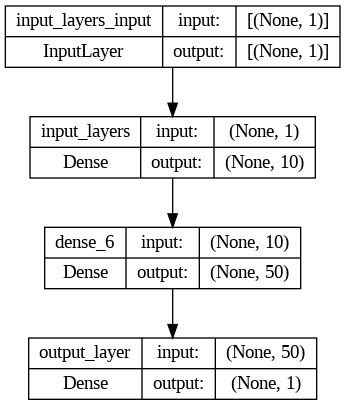

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

### Visualizing our model pridiction

In [ ]:
# Make some pridiction
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 56ms/step


array([[ 70.00485],
       [ 74.00384],
       [ 78.00281],
       [ 82.00178],
       [ 86.00077],
       [ 89.99974],
       [ 93.99872],
       [ 97.99772],
       [101.99668],
       [105.99566]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
from matplotlib import figure
# Lets create a plotting function

def plot_predictions(train_data= X_train,
                     train_lables= Y_train,
                     test_data= X_test,
                     test_lables= Y_test,
                     predictions=y_pred):
  """
  plot training data, test data and compare prediction to ground truth lable.
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue#
  plt.scatter(train_data, train_lables, c="b",label="Training data")
#plot test data in green#
  plt.scatter(test_data ,test_lables,c="g", label="Testing data")
  plt.scatter(test_data,predictions, c="r",  )
#show a legend#
  plt.legend();




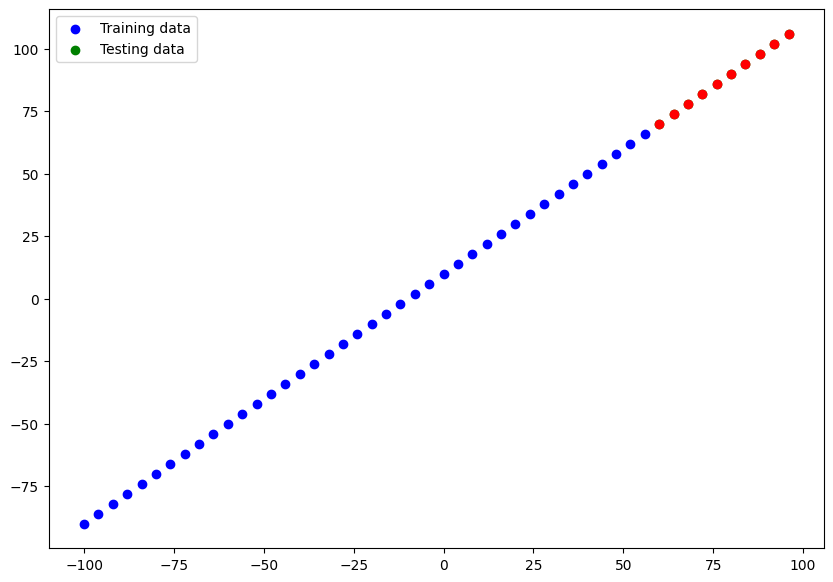

In [ ]:
plot_predictions(train_data= X_train,
                     train_lables= Y_train,
                     test_data= X_test,
                     test_lables= Y_test,
                     predictions=y_pred);

###Evaluating our model

In [ ]:
# Evaluate a model on the test set
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 158ms/step - loss: 0.0026 - mae: 0.0026


[0.0025535584427416325, 0.0025535584427416325]

In [ ]:
#calculate the mean absolute error
mae= tf.metrics.mean_absolute_error(y_true= Y_test,
                               y_pred = tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.996119, 14.797697, 12.398877, 10.799644, 10.      , 10.      ,
       10.799744, 12.399088, 14.798009, 17.996527], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.00485],
       [ 74.00384],
       [ 78.00281],
       [ 82.00178],
       [ 86.00077],
       [ 89.99974],
       [ 93.99872],
       [ 97.99772],
       [101.99668],
       [105.99566]], dtype=float32)>

In [ ]:
y_pred

array([[ 70.00485],
       [ 74.00384],
       [ 78.00281],
       [ 82.00178],
       [ 86.00077],
       [ 89.99974],
       [ 93.99872],
       [ 97.99772],
       [101.99668],
       [105.99566]], dtype=float32)

In [ ]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.00485,  74.00384,  78.00281,  82.00178,  86.00077,  89.99974,
        93.99872,  97.99772, 101.99668, 105.99566], dtype=float32)>

In [ ]:
#calculate the absulute mean error
mae = tf.metrics.mean_absolute_error(y_true=Y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.0025527955>

In [ ]:
# calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=Y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=8.668203e-06>

In [ ]:
#make some function to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiment to improve our model
1. Get more data
2. make your model larger
3. Train for longer
lets do three modelling experimentsz:
1. `model_1` - same as the original model , 1 layer , trained for 100epochs .
2.  `model_2` - 2 layers , training for 100 epochs.
3. `model_3` - 2 layers, for 500 epochs.


### Build model_1

In [ ]:
#set random seed
tf.random.set_seed(42)

# create  the model
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
     #tf.keras.layers.Dense(10, input_shape =[1], name="input_layers"),
    #tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])

# compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#fit the model
model_1.fit(X_train,Y_train,epochs=100)


Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 54.0107 - mae: 54.0107
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 20.1157 - mae: 20.1157
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 7.8074 - mae: 7.8074
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 8.7414 - mae: 8.7414
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8016 - mae: 10.8016
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.9897 - mae: 9.9897
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0395 - mae: 9.0395
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 9.0941 - mae: 9.0941
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 19.9057 - mae: 19.9057
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.7639 - mae: 10.7639
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - lo

1/1 [==============================] - 0s 49ms/step


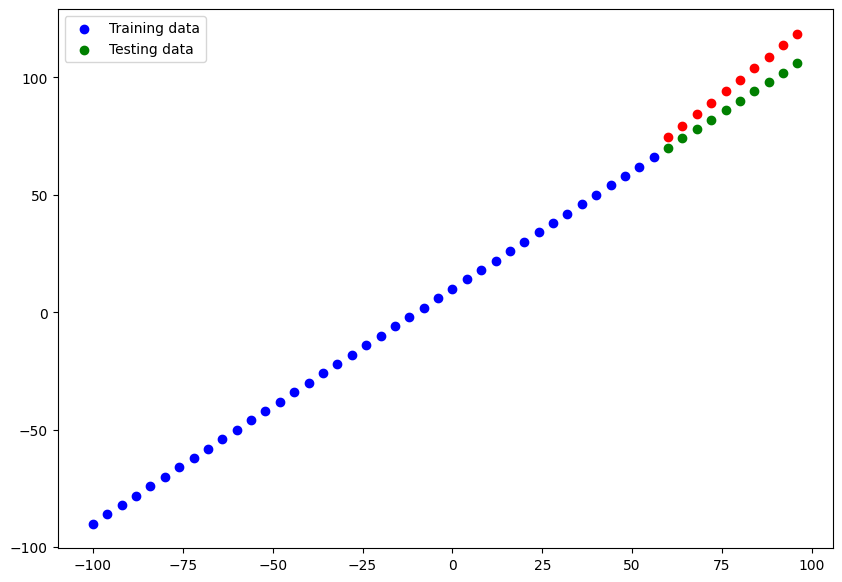

In [ ]:
# make and plot the pridiction
Y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=Y_pred_1)

In [ ]:
Y_pred_1

array([[ 74.56304 ],
       [ 79.44737 ],
       [ 84.3317  ],
       [ 89.21603 ],
       [ 94.10036 ],
       [ 98.98468 ],
       [103.86901 ],
       [108.75334 ],
       [113.637665],
       [118.521996]], dtype=float32)

In [ ]:
# Calculate model_1 on  ecvaluation metrics
#mae_1= tf.metrics.mean_absolute_error(y_true= Y_test,
                              # Y_pred_1 = tf.constant(Y_pred_1))
#mae_1
mae_1=mae(Y_test ,  tf.squeeze(Y_pred_1))
mse_1=mse(Y_test ,  tf.squeeze(Y_pred_1))
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=8.54252>,
 <tf.Tensor: shape=(), dtype=float32, numpy=79.42643>)

** `Build` 2nd model of 2 layers with 100 epoch

In [ ]:

tf.random.set_seed(42)
# create a model
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape =(1,)),
     #tf.keras.layers.Dense(10, input_shape =[1], name="input_layers"),
    tf.keras.layers.Dense(10),
    #tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)

])
# compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
#fit the model
model_2.fit(X_train,Y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 58.0923 - mse: 5163.7192
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 30.1136 - mse: 1196.3323
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 33.3865 - mse: 1708.5153
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 17.6634 - mse: 438.5875
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 23.6454 - mse: 825.7780
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 11.0001 - mse: 134.4203
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 12.0626 - mse: 183.5014
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 13.1454 - mse: 241.1358
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 34.9005 - mse: 1840.0160
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 24.2543 - mse: 823.5812
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 91ms/step


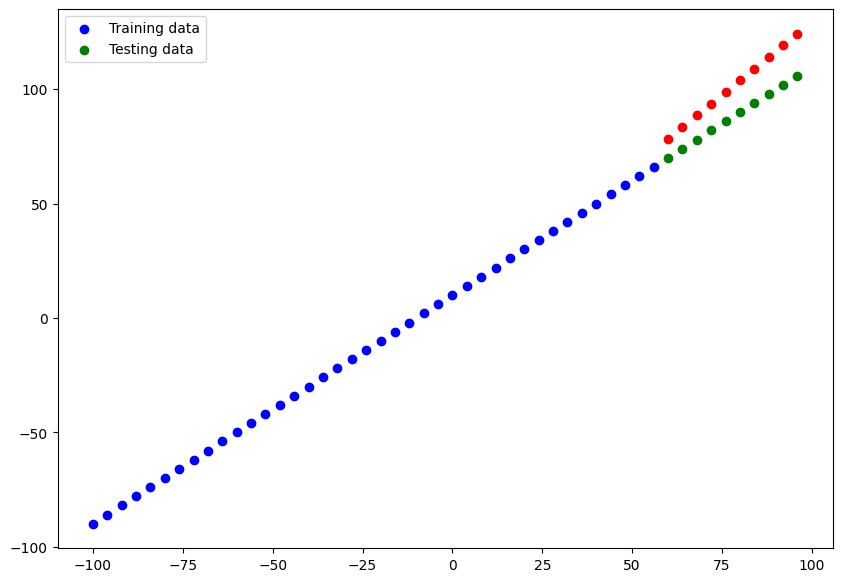

In [ ]:
Y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=Y_pred_2)

In [ ]:
mae_2= mae(Y_test,Y_pred_2)
mse_2 = mse(Y_test,Y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.287642>,
 <tf.Tensor: shape=(), dtype=float32, numpy=186.6026>)

**BUild ` model_3` **
* 2 layers with 500 epochs

In [ ]:
#model_3
tf.random.set_seed(42)

# create  the model
model_3 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#fit the model
model_3.fit(X_train,Y_train,epochs=500)


Epoch 1/500
2/2 [==============================] - 1s 12ms/step - loss: 20.5857 - mae: 20.5857
Epoch 2/500
2/2 [==============================] - 0s 6ms/step - loss: 24.1626 - mae: 24.1626
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 22.6399 - mae: 22.6399
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 14.4995 - mae: 14.4995
Epoch 5/500
2/2 [==============================] - 0s 6ms/step - loss: 20.7658 - mae: 20.7658
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 8.2053 - mae: 8.2053
Epoch 7/500
2/2 [==============================] - 0s 6ms/step - loss: 17.7489 - mae: 17.7489
Epoch 8/500
2/2 [==============================] - 0s 7ms/step - loss: 17.5097 - mae: 17.5097
Epoch 9/500
2/2 [==============================] - 0s 6ms/step - loss: 30.4607 - mae: 30.4607
Epoch 10/500
2/2 [==============================] - 0s 8ms/step - loss: 12.5043 - mae: 12.5043
Epoch 11/500
2/2 [==============================] - 0s 7ms/s

1/1 [==============================] - 0s 53ms/step


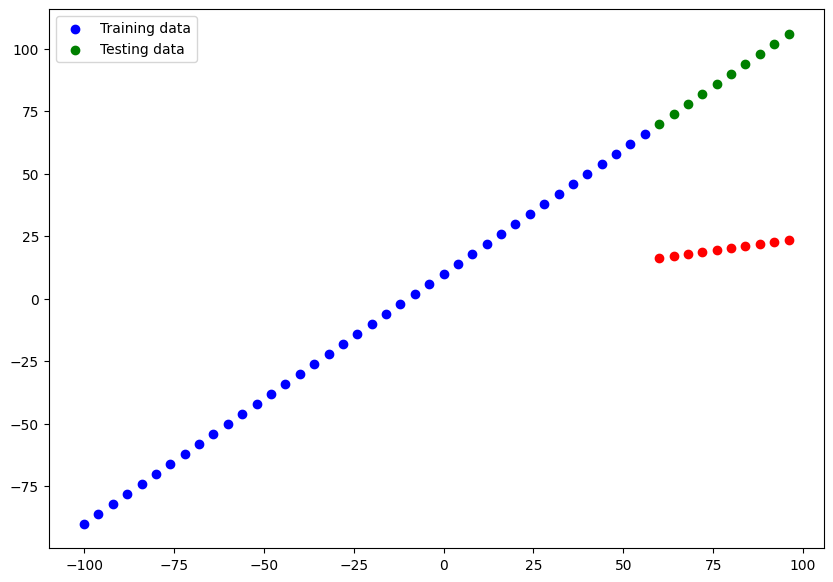

In [ ]:
Y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=Y_pred_3)

In [ ]:
mae_3= mae(Y_test,Y_pred_3)
mse_3 = mse(Y_test,Y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.923485>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4698.0464>)

### Compare the result of our experiment

In [ ]:
# lets compare our result using pandas DataFrame
import pandas as pd

model_results =[["model_1", mae_1.numpy(),mse_1.numpy()],
                ["model_2", mae_2.numpy(),mse_2.numpy()],
                ["model_3", mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns=["model", "mae" , "mse"])
all_results

,model,mae,mse
0,model_1,8.542520,79.426430
1,model_2,13.287642,186.602600
2,model_3,67.923485,4698.046387


Looks model_2 performs the best

In [ ]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Tracking your experiments

for tracking our experiment we have some tools to help us
* TensorBoad -
* Weights & Biased



### Saving our model

In [ ]:
model_2.save("/content")

In [ ]:
model_2.save("/content.h5")

###load the model

In [ ]:
loaded_SavedModel_format = tf.keras.models.load_model("/content")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                20        
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


###A large example


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
#REad the insurence dataset
insurance = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#lets try one-hot encode our dataFrame so its all number
insurance_one_hot=pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and Y values (features and lable )
X = insurance_one_hot.drop("charges",axis=1)
Y = insurance_one_hot["charges"]

In [ ]:
#view X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Creating training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=42)
len(X),len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build the nural network (sort of like model_2 above)
tf.random.set_seed(42)
# 1 create a model
insurance_model = tf.keras.Sequential([
    #tf.keras.Input(shape =(1,)),
    #tf.keras.layers.Dense(10, input_shape =[1], name="input_layers"),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# 3. fit the model
insurance_model.fit(X_train, Y_train , epochs=100)
#insurance_model.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=100)



Epoch 1/100
34/34 [==============================] - 1s 1ms/step - loss: 8606.7510 - mae: 8606.7510
Epoch 2/100
34/34 [==============================] - 0s 1ms/step - loss: 7818.5181 - mae: 7818.5181
Epoch 3/100
34/34 [==============================] - 0s 1ms/step - loss: 7579.2153 - mae: 7579.2153
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7785.3428 - mae: 7785.3428
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7651.7788 - mae: 7651.7788
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7586.9688 - mae: 7586.9688
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 7614.8394 - mae: 7614.8394
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 7799.0229 - mae: 7799.0229
Epoch 9/100
34/34 [==============================] - 0s 1ms/step - loss: 7607.6479 - mae: 7607.6479
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7741.9995 - mae: 7741.9995

In [ ]:
# Cheack the result of the insurance model on the test data
insurance_model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8701.8408 - mae: 8701.8408


[8701.8408203125, 8701.8408203125]

In [ ]:
Y_train.median(), Y_train.mean()

(9575.4421, 13346.089736364485)

Right now our model is not performing too well ... lets try to improve it
to (try) to improve our model, we'll run 2 experiments:
1. Add a extra layer with more hidden units and use the ADAM optimizer
2. Same as above but train for longer(200 epochs)


In [ ]:
# Build the nural network (sort of like model_2 above)
tf.random.set_seed(42)
# 1 create a model
insurance_model_2 = tf.keras.Sequential([
    #tf.keras.Input(shape =(1,)),
    #tf.keras.layers.Dense(10, input_shape =[1], name="input_layers"),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
# 3. fit the model
insurance_model_2.fit(X_train, Y_train , epochs=100, verbose=1)
#insurance_model.fit(tf.expand_dims(X_train,axis=1),Y_train,epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13261.9219 - mae: 13261.9219
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13061.3701 - mae: 13061.3701
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 12659.6396 - mae: 12659.6396
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11917.2734 - mae: 11917.2734
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10745.2861 - mae: 10745.2861
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9325.5391 - mae: 9325.5391
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8080.9868 - mae: 8080.9868
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7530.1030 - mae: 7530.1030
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7443.3462 - mae: 7443.3462
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7423.1978 - mae:

In [ ]:
# Evaluate  the larger model
insurance_model_2.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4848.5903 - mae: 4848.5903


[4848.59033203125, 4848.59033203125]

In [ ]:
#model_3 for insuance
tf.random.set_seed(42)

# 1. create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
# 2. compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
history = insurance_model_3.fit(X_train,Y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13290.9131 - mae: 13290.9131
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13137.0576 - mae: 13137.0576
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 12819.2002 - mae: 12819.2002
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12184.9990 - mae: 12184.9990
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 11095.2686 - mae: 11095.2686
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 9649.3311 - mae: 9649.3311
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8270.1846 - mae: 8270.1846
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 7552.1689 - mae: 7552.1689
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7419.5195 - mae: 7419.5195
Epoch 10/200
34/34 [==============================] - 0s 3ms/step - loss: 7398.4912 - mae:

In [ ]:
# EVALUATE our third model
insurance_model_3.evaluate(X_test,Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3501.5979 - mae: 3501.5979


[3501.597900390625, 3501.597900390625]

Text(0.5, 0, 'epochs')

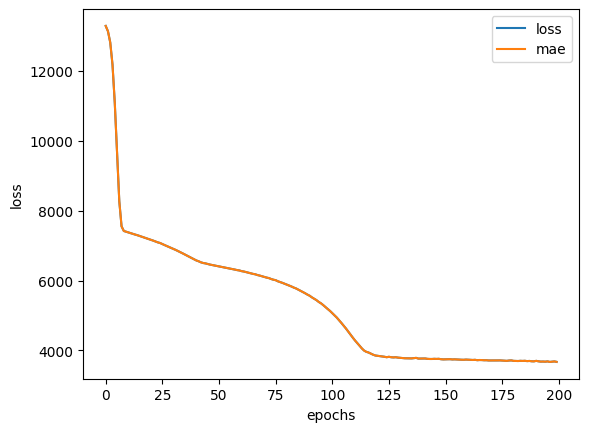

In [ ]:
# Plot history (also know as a loss curve or a training  curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### preprocessing data (normilization and standardization )
In terms of scaling values, neural network tends to prefer normilization.
If you're not sure on which to use , you could try both and see which performce better

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://gist.githubusercontent.com/meperezcuello/82a9f1c1c473d6585e750ad2e3c05a41/raw/d42d226d0dd64e7f5395a0eec1b9190a10edbc03/Medical_Cost.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepaire our data we can borrow a few classes from scikit-lear.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler , OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(),["age", "bmi", "children"]),# trun all value column between 0 and 1 (which are in numerical form )
    (OneHotEncoder(handle_unknown="ignore"),["sex", "smoker", "region"])
)
#Create X and Y
X = insurance.drop("charges", axis=1)
Y = insurance["charges"]

# Build our train and test sets
X_train, X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state = 42)
# Fit the our column tranformer to our training data
ct.fit(X_train)
# Transform training test data with normilization (MInMaxScaller) and OneHOtEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
#What does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Beautiful our data has been  normalize one hpt encoded.
now lets build neueral network  model on it and seehow its goes

In [ ]:
#Build the neural network model to fit on our normlized data
tf.random.set_seed(42)
# 1 create a model
insurance_model_4 = tf.keras.Sequential([
    #tf.keras.Input(shape =(1,)),
    #tf.keras.layers.Dense(10, input_shape =[1], name="input_layers"),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"])
# 3. fit the model
insurance_model_4.fit(X_train_normal, Y_train, epochs=100)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.8711 - mae: 13343.8711
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.9463 - mae: 13333.9463
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13309.2480 - mae: 13309.2480
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13257.4062 - mae: 13257.4062
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13166.7695 - mae: 13166.7695
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13026.4688 - mae: 13026.4688
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12826.3848 - mae: 12826.3848
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12556.7236 - mae: 12556.7236
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12207.7705 - mae: 12207.7705
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11780.88

In [ ]:
insurance_model_4.evaluate(X_test_normal,Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3435.0603 - mae: 3435.0603


[3435.060302734375, 3435.060302734375]

In [ ]:
#Insurance model 2 result
#9/9 [==============================] - 0s 2ms/step - loss: 4887.7412 - mae: 4887.7412



<Axes: ylabel='Frequency'>

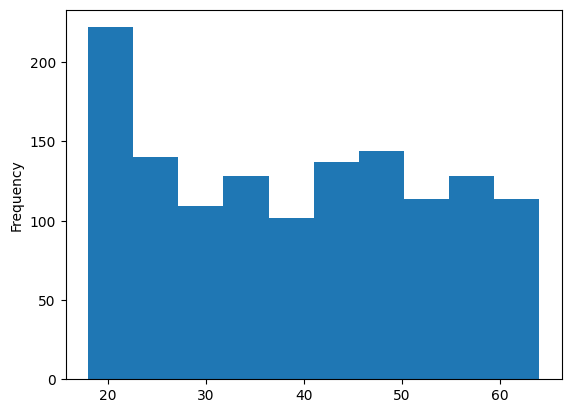

In [ ]:
X["age"].plot(kind="hist")

<Axes: ylabel='Frequency'>

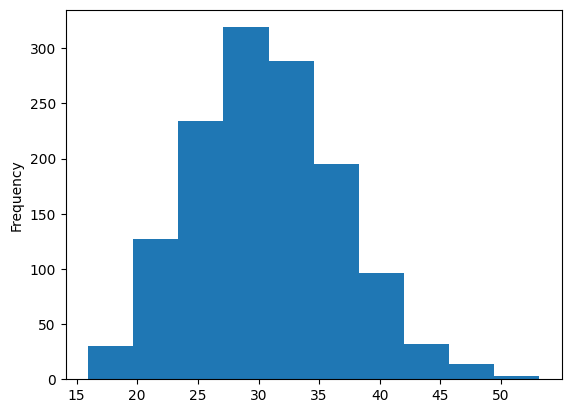

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64